# NAISS MLB Project 1

Your friend John is a flower farmer, but he's an idiot. Despite studying agriculture for 5 years, he doesn't know how to classify the different types of flowers for his client. He needs something that will classify the different flowers for him by using the properties of flowers, since he can't figure it out himself. He called you to help you him out.

He gave you a dataset that has a bunch of instances of flowers. It can in the form of a .csv file, kind of like an excel spreadsheet. Each row represents a different type of flower, and each column represents a feature of that flower(like petal length, sepal length, etc.).

Train an Ai to classify the different flowers for your friend John, since he can't even do his own job.

## Load & split dataset

In [166]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42 # Hehe

dataset = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(dataset['data'], dataset['target'], test_size=0.25, random_state=RANDOM_STATE)

## Explore dataset

In [167]:
import pandas as pd

df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)      target
count         150.000000        150.000000         150.000000        150.000000  150.000000
mean            5.843333          3.057333           3.758000          1.199333    1.000000
std             0.828066          0.435866           1.765298          0.762238    0.819232
min             4.300000          2.000000           1.000000          0.100000    0.000000
25%             5.100000          2.800000           1.600000          0.300000    0.000000
50%             5.800000          3.000000           4.350000          1.300000    1.000000
75%             6.400000          3.300000           5.100000          1.800000    2.000000
max             7.900000          4.400000           6.900000          2.500000    2.000000


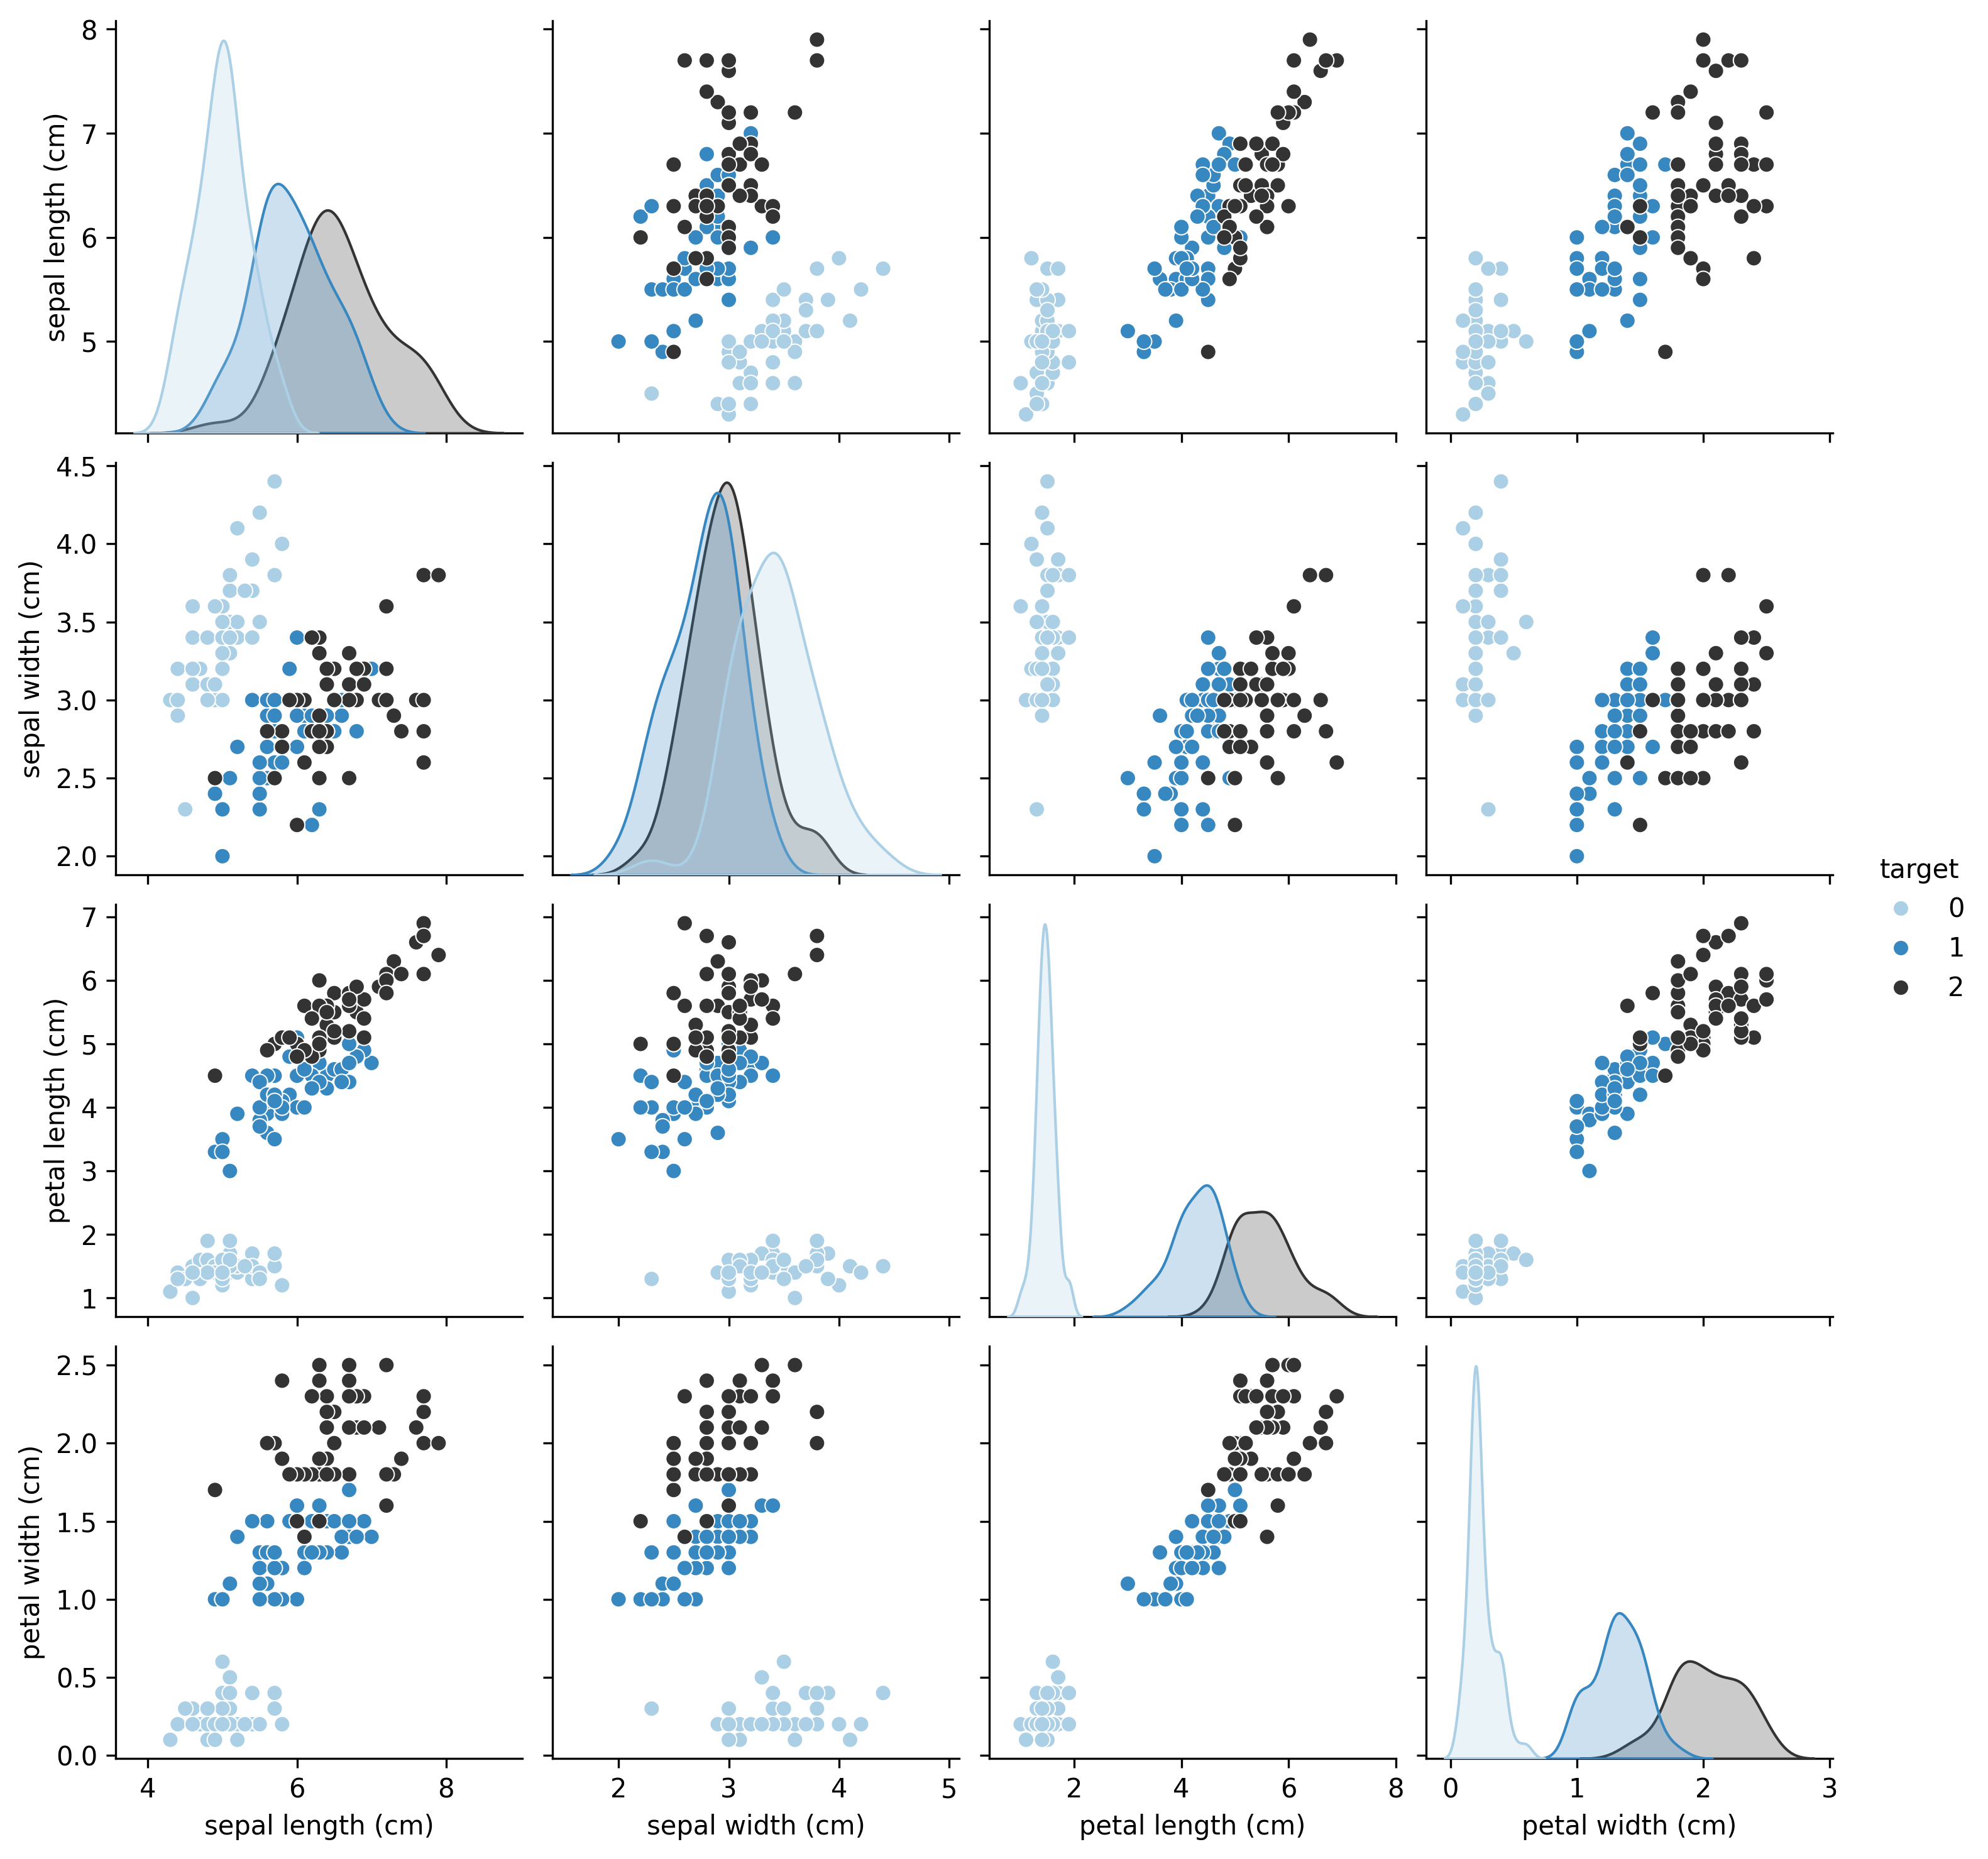

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✨ Higher dpi for my retinal health ✨
plt.rcParams['figure.dpi'] = 300

sns.pairplot(df, vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], palette='Blues_d', hue='target')

Petal features are more discernible!

## Fit & Evaluate

### Fit SVM based on all features

In [171]:
from sklearn.svm import SVC

svc = SVC(random_state=RANDOM_STATE)
svc.fit(data_train, target_train)

SVC(random_state=42)

#### Evaluate

In [172]:
svc.score(data_test, target_test)

1.0

### Fit SVM based on petal features and plot decision boundaries

In [173]:
svc_petals = SVC(random_state=RANDOM_STATE)
svc_petals.fit(data_train[['petal length (cm)', 'petal width (cm)']], target_train)

SVC(random_state=42)

#### Evaluate

In [174]:
svc_petals.score(data_test[['petal length (cm)', 'petal width (cm)']], target_test)

1.0

#### Plot decision boundaries

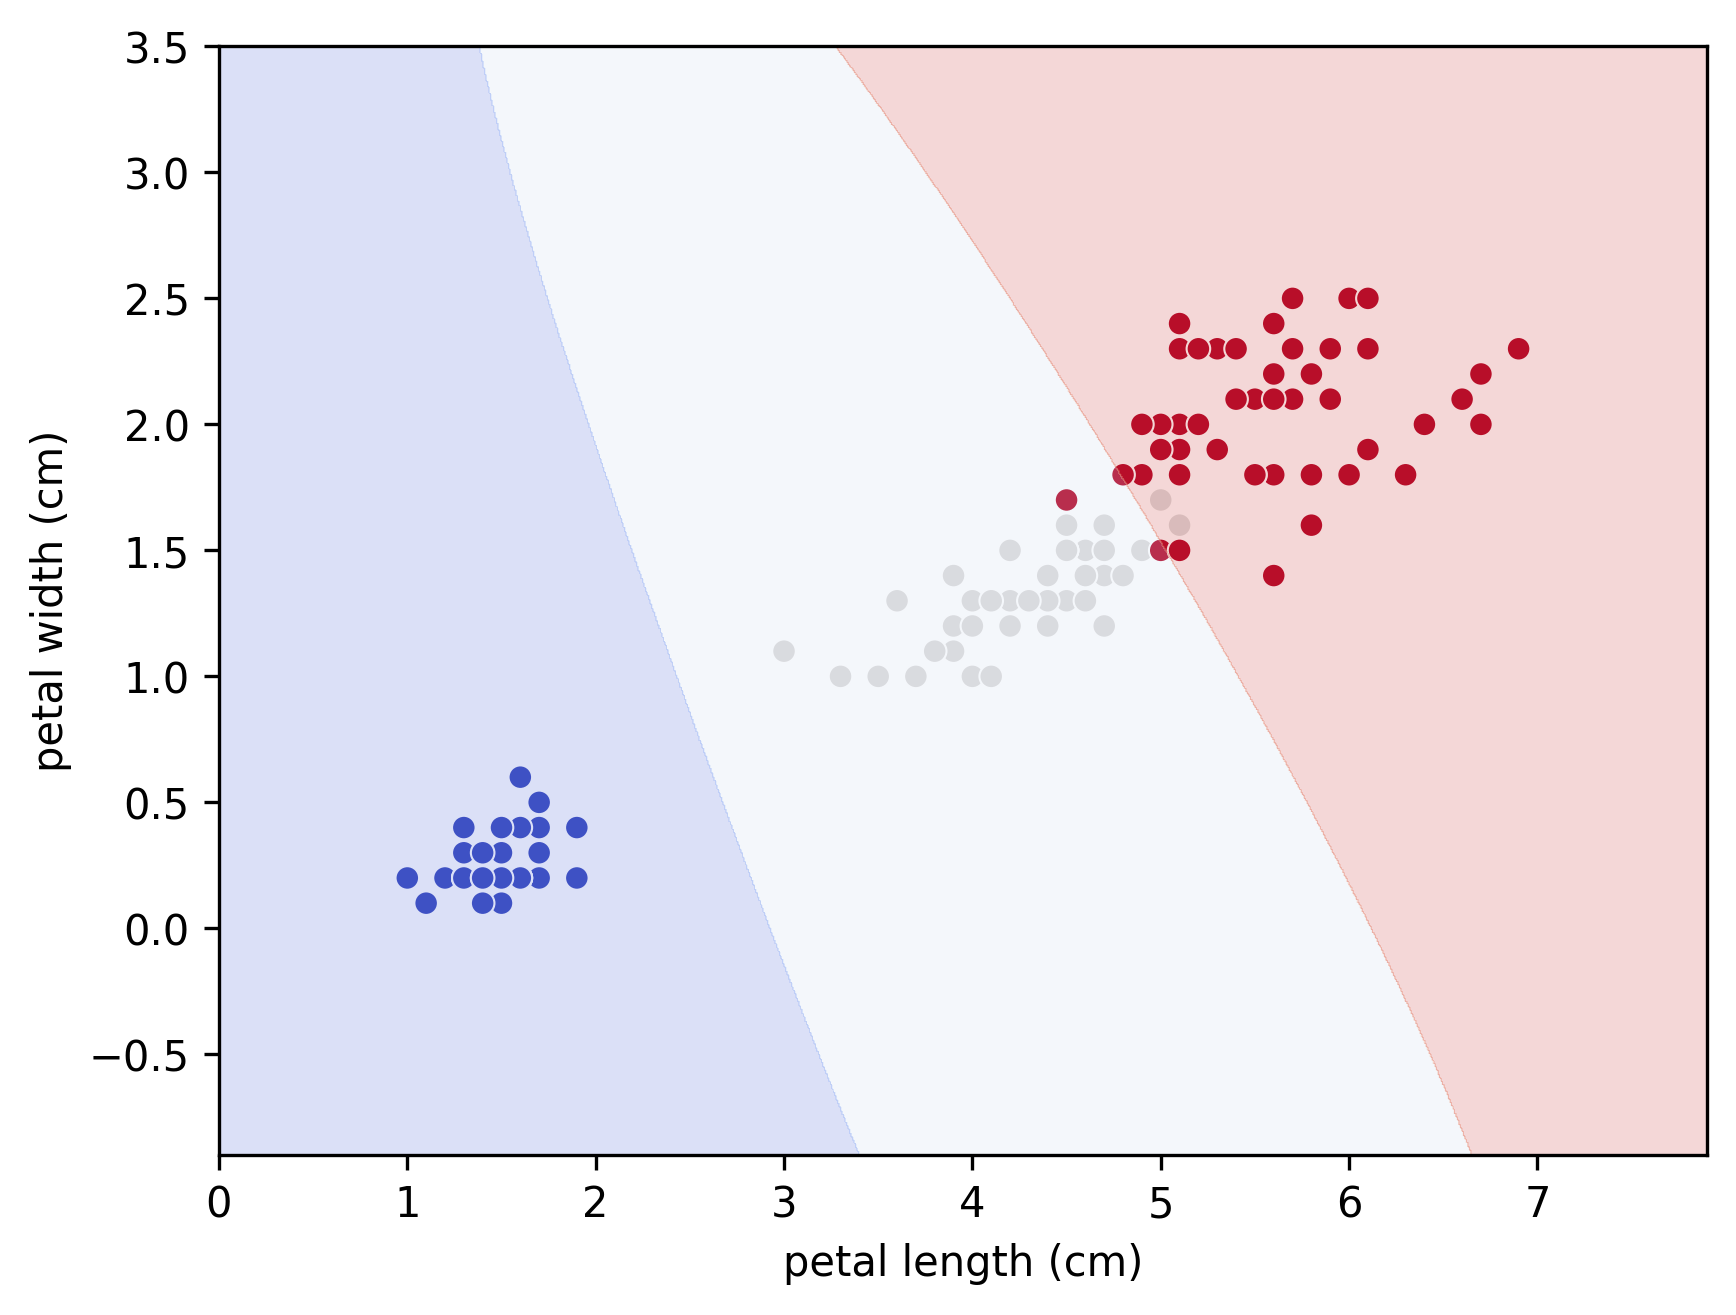

In [180]:
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['target'], s=32, cmap='coolwarm', edgecolors='w', linewidths=0.5)

disp = DecisionBoundaryDisplay.from_estimator(
    svc_petals,
    df[['petal length (cm)', 'petal width (cm)']],
    ax=plt.gca(),
    grid_resolution=1000,
    response_method="predict",
    xlabel='petal length (cm)',
    ylabel='petal width (cm)',
    cmap='coolwarm', alpha=0.2
)

plt.show()